In [1]:
import pandas as pd
pd.options.display.max_rows = 1000

import pickle

import numpy as np

import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [2]:
with open('../data/interim/04_neighborhoods_lemmas.pkl', 'rb') as picklefile:
    df_neighborhoods = pickle.load(picklefile)

In [3]:
descriptions = df_neighborhoods['lemmas'].tolist()

In [4]:
len(descriptions)

895

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, ward, dendrogram

In [6]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),
                                   #max_df=0.5, 
                                   min_df=20,
                                   max_features=500)

tfidf = tfidf_vectorizer.fit_transform(descriptions).toarray()
tfidf_features = tfidf_vectorizer.get_feature_names()

In [7]:
#10 words with highest tfidf
top = tfidf_vectorizer.idf_.argsort()[:10].tolist()
[(tfidf_features[i], tfidf_vectorizer.idf_[i]) for i in top]

[(u'shop', 1.0813456394539525),
 (u'store', 1.1221171913400827),
 (u'home', 1.1399293671041821),
 (u'easy', 1.1619938572882842),
 (u'grocery', 1.1619938572882842),
 (u'safe', 1.1725480449669743),
 (u'bar', 1.1765347612107957),
 (u'food', 1.1858993781418385),
 (u'access', 1.1926424920267287),
 (u'well', 1.2062666809662723)]

In [8]:
#10 words with lowest tfidf
bottom = tfidf_vectorizer.idf_.argsort()[::-1].tolist()[:10]
[(tfidf_features[i], tfidf_vectorizer.idf_[i]) for i in bottom]

[(u'flea', 3.7204029690692111),
 (u'brownstone', 3.7035958507528299),
 (u'surf', 3.6235531430792935),
 (u'canal', 3.5784327077988238),
 (u'fame', 3.4804522994386202),
 (u'boardwalk', 3.4804522994386202),
 (u'botanical', 3.1439800628174073),
 (u'museum art', 3.0530082846116806),
 (u'loft', 2.9304059625193482),
 (u'season', 2.9227430897737792)]

In [9]:
tfidf.shape

(895, 500)

In [10]:
#cities = df_cities_grouped['city'].tolist()
neighborhoods = df_neighborhoods['neighborhood'].tolist()
cities = df_neighborhoods['city'].tolist()
states = df_neighborhoods['state'].tolist()

### PCA

In [11]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=50, random_state=16)

In [21]:
pca.fit_transform(tfidf)

array([[ 0.26428551,  0.05983814, -0.02080447, ..., -0.01153216,
         0.00738631,  0.05667201],
       [ 0.18891391, -0.16414162,  0.07980601, ..., -0.00782485,
        -0.04577614,  0.01271494],
       [ 0.2066614 ,  0.08423836, -0.01605633, ..., -0.00871892,
        -0.01063824,  0.02002616],
       ..., 
       [ 0.1285277 ,  0.1268347 ,  0.16791309, ..., -0.00195445,
        -0.04682692, -0.04230028],
       [ 0.16810088,  0.05794504,  0.14955541, ..., -0.03493482,
        -0.02149697, -0.00378727],
       [ 0.22790346, -0.1744484 ,  0.07704809, ...,  0.01743816,
        -0.00101286, -0.06558305]])

In [22]:
pca.explained_variance_ratio_

array([ 0.0512637 ,  0.03064721,  0.02510139,  0.0207072 ,  0.01725742,
        0.01524508,  0.01485133,  0.01369658,  0.01355338,  0.01318721,
        0.01193379,  0.01121487,  0.01026043,  0.00962223,  0.00955989,
        0.00915117,  0.00873735,  0.00854531,  0.00807693,  0.00780958,
        0.00763835,  0.0074596 ,  0.00688617,  0.00677704,  0.0066349 ,
        0.00639999,  0.00637267,  0.00630369,  0.00613769,  0.0059247 ,
        0.00572203,  0.00555708,  0.00552428,  0.00543713,  0.00532665,
        0.00517909,  0.00513668,  0.00498229,  0.00494693,  0.00487919,
        0.00476662,  0.00470519,  0.00464981,  0.00453849,  0.0044827 ,
        0.00444395,  0.00436969,  0.00423158,  0.00418713,  0.00409251])

In [23]:
sum(pca.explained_variance_ratio_)

0.47411584668466317

In [24]:
from sklearn.manifold import TSNE

In [41]:
pca.components_[0]

array([ -1.94699071e-02,   4.87915731e-03,   2.45335400e-02,
         8.19974867e-03,  -5.71224820e-03,  -6.67922149e-02,
         9.64600631e-03,   6.38539954e-03,   4.29249953e-02,
         6.06892685e-02,   1.20275074e-02,   4.91960046e-03,
         2.76543157e-02,   1.53772175e-02,   1.10763738e-02,
         8.98879562e-02,   3.16143087e-02,   1.87764769e-03,
         1.26248882e-01,   6.10652646e-02,   3.98016155e-02,
         7.52561197e-03,   4.94680386e-03,   1.41401559e-02,
        -1.42114039e-02,   5.93525735e-02,   2.90664972e-02,
         4.17765357e-02,  -2.94284007e-02,   4.96797903e-01,
         4.85023661e-02,   5.79392100e-02,  -7.86796838e-03,
         2.26265780e-02,   1.72669887e-03,  -3.43648474e-03,
         2.96146315e-02,   7.06460858e-02,   1.82146655e-01,
         3.61303869e-02,   6.36151302e-03,   6.77881906e-02,
         2.41312955e-02,   5.04488763e-03,  -1.64212639e-02,
         1.57516312e-02,  -1.04917379e-02,   2.70501831e-02,
         1.91228654e-03,

In [36]:
model = TSNE(n_components=2, random_state=16)

In [37]:
X = model.fit_transform(pca.components_)

ValueError: array must not contain infs or NaNs

In [111]:
zipped = zip(neighborhoods, cities, states)

In [112]:
terms = tfidf_vectorizer.get_feature_names()

In [113]:
dist = 1 - cosine_similarity(tfidf)
linkage_matrix = ward(dist)

In [114]:
linkage_matrix = linkage(dist, method='complete', metric='cosine')

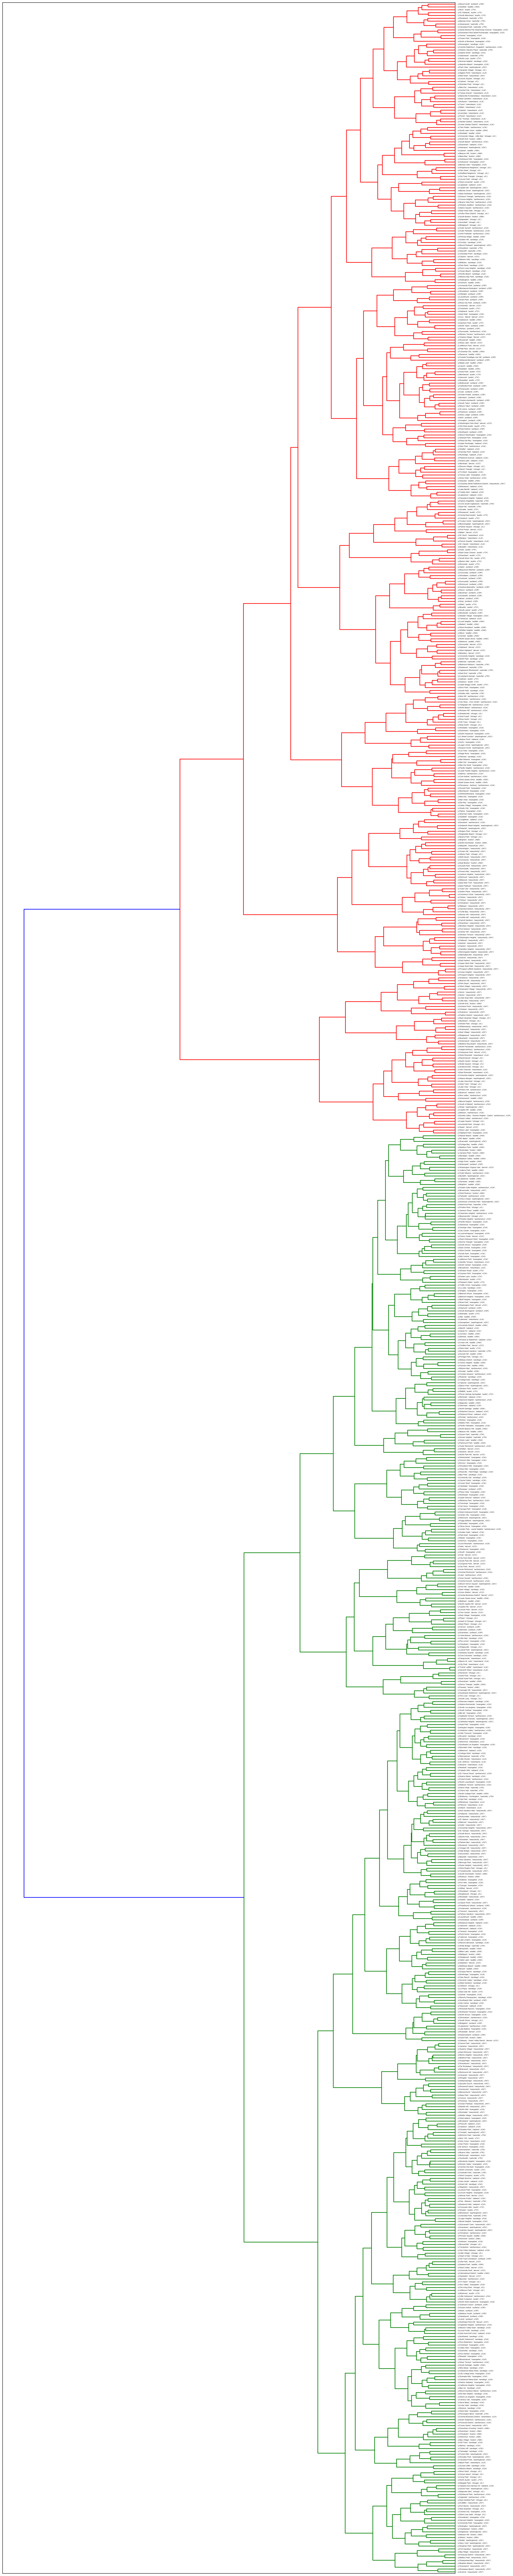

In [115]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
dend = dendrogram(linkage_matrix,
                p=12,
                #truncate_mode='lastp', 
                labels=zipped,
                orientation='left');

ax = dend

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=300) #save figure as ward_clusters

In [116]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [133]:
db = DBSCAN(eps=0.5, min_samples=5, metric='cosine', algorithm='brute').fit(tfidf)

In [134]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [135]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [136]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1
